## LSTM - AFR dataset

### 1. Objective:
    To find the polarity of review

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### 2. Data Import:

In [0]:
# References 
# https://www.programcreek.com/python/example/99451/sklearn.externals.joblib.dump

from sklearn.externals import joblib

In [0]:
# load data from pickle file

x_train = joblib.load("x_train.pkl")
x_test = joblib.load("x_test.pkl")

In [0]:
# Load label from pickle file

y_train = joblib.load("y_train.pkl")
y_test = joblib.load("y_test.pkl")

In [9]:
len(x_train[0])

69

In [10]:
type(x_train[0])

list

In [11]:
y_train.value_counts()

1    245654
0     45682
Name: Score, dtype: int64

### 3. Padding:

In [12]:
# https://keras.io/preprocessing/sequence/
# https://keras.io/examples/imdb_lstm/

from keras.preprocessing import sequence

Using TensorFlow backend.


In [0]:
# padding of train and test data


x_train=sequence.pad_sequences(x_train,maxlen=100)
x_test =sequence.pad_sequences(x_test,maxlen=100)

In [14]:
x_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,    11,  3643,   187,   102,   341,
          17,  1762,  1903,  1081,   419,     1,    55,   419,  1222,
         225,  1770,  2082,   792,  2096,  2447,   746,   369,   352,
         858,    23,   209,    26,     5,    24,   209,    90,   580,
         127,   849,   114,   557,  1978,    16,   186,     1,   196,
        1646,   259,   975,   452,  1367,    41,    59,  1460,   638,
           1,   603,  4355,    96,    38,   624,    60, 11423,   237,
        1367, 11973,   265,   345,   273,     4,   207,   114,    19,
         562], dtype=int32)

In [15]:
x_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,   29,   46,  341,    1,    3,    2,  151, 2216,
        178,   66,  833,   33,   84,    5,  151, 2216,   46,    4, 1328,
       1263,    3,  411,  284,   33,  178,   42,   29,   78,  204,   45,
         86], dtype=int32)

In [16]:
print(x_train.shape)
print(x_test.shape)

(291336, 100)
(72835, 100)


### 4. LSTM Model 

### 4.1 Single LSTM layer:

#### 4.1.1 Sequence model:

In [0]:
# References
# https://keras.io/layers/

from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM
from keras.initializers import glorot_normal

In [0]:
# References
# https://keras.io/layers/embeddings/#embedding
# https://keras.io/layers/recurrent/#lstm

# vocabulary size = 64868 +1 = 64869 = input_dim

# model creation

model=Sequential()

# embedding layer

model.add(Embedding(input_dim= 64869,output_dim=32,input_length=100,embeddings_initializer="glorot_normal"))

# LSTM layer

model.add(LSTM(100))

# Dense layer

model.add(Dense(1,activation="sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           2075808   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 2,129,109
Trainable params: 2,129,109
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Model compilation

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

#### 4.1.2 Model Training:

In [0]:
# model training

History=model.fit(x_train,y_train,batch_size=1000,epochs=10,verbose=1,validation_split=0.3)

Instructions for updating:
Use tf.cast instead.
Train on 203935 samples, validate on 87401 samples
Epoch 1/10
203935/203935 [==============================] - 415s 2ms/step - loss: 0.2981 - acc: 0.8864 - val_loss: 0.1984 - val_acc: 0.9216
Epoch 2/10
203935/203935 [==============================] - 418s 2ms/step - loss: 0.1827 - acc: 0.9289 - val_loss: 0.1947 - val_acc: 0.9258
Epoch 3/10
203935/203935 [==============================] - 419s 2ms/step - loss: 0.1681 - acc: 0.9348 - val_loss: 0.1946 - val_acc: 0.9245
Epoch 4/10
203935/203935 [==============================] - 409s 2ms/step - loss: 0.1589 - acc: 0.9393 - val_loss: 0.1971 - val_acc: 0.9246
Epoch 5/10
203935/203935 [==============================] - 416s 2ms/step - loss: 0.1500 - acc: 0.9430 - val_loss: 0.1983 - val_acc: 0.9229
Epoch 6/10
203935/203935 [==============================] - 417s 2ms/step - loss: 0.1401 - acc: 0.9468 - val_loss: 0.2006 - val_acc: 0.9230
Epoch 7/10
203935/203935 [==============================] - 4

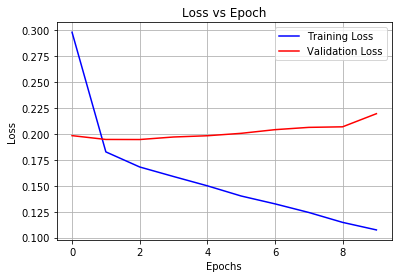

In [0]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

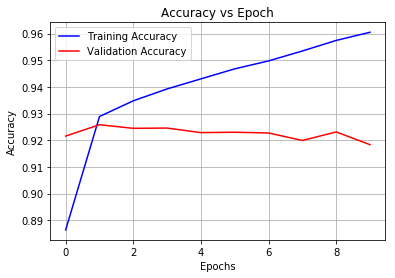

In [0]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [0]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'embedding_1', 'trainable': True, 'batch_input_shape': (None, 100), 'dtype': 'float32', 'input_dim': 64869, 'output_dim': 32, 'embeddings_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'normal', 'seed': None}}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': 100}
{'name': 'lstm_1', 'trainable': True, 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'units': 100, 'activation': 'tanh', 'recurrent_activation': 'hard_sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': 

In [0]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[1].get_weights()[0]
layer3_weights = model.layers[2].get_weights()[0]

print(" Embedding Layer Weight Matrix Shape")
print("="*125)
print(layer1_weights.shape)
print(" LSTM  Weight Matrix Shape")
print("="*125)
print(layer2_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*125)
print(layer3_weights.shape)

 Embedding Layer Weight Matrix Shape
(64869, 32)
 LSTM  Weight Matrix Shape
(32, 400)
 Output Layer Weight Matrix Shape
(100, 1)


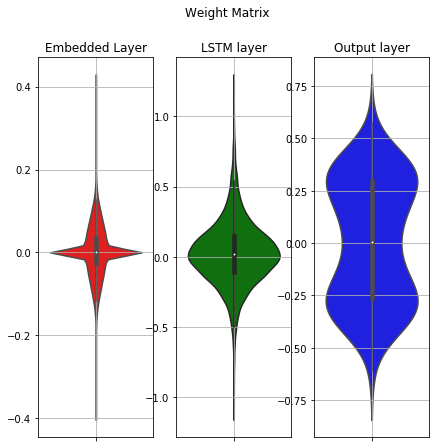

In [0]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(1,figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 3, 1)
plt.title("Embedded Layer")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,3,2)
plt.title("LSTM layer")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,3,3)
plt.title("Output layer")
sns.violinplot(y=layer3_weights,color='b')
plt.grid()

#### 4.1.3 Model Evaluation:

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(x_test,y_test,verbose=0)

In [0]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.2180799318348493
 Evaluate Accuracy
0.9180613715941457


#### 4.1.4 Model Observation:

In [0]:
from prettytable import PrettyTable

In [0]:
a=PrettyTable()
b=PrettyTable()
b.field_names = ["Optimizer","Dropout rate","Batch Size","Epochs"]
b.add_row(["Adam","Nil",1000,10])
a.field_names = ["LSTM layer","units","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([1,100,0.1074,0.2196 ,0.2180,0.9605,0.9183,0.9180])
print(b)
print(a)


+-----------+--------------+------------+--------+
| Optimizer | Dropout rate | Batch Size | Epochs |
+-----------+--------------+------------+--------+
|    Adam   |     Nil      |    1000    |   10   |
+-----------+--------------+------------+--------+
+------------+-------+------------+----------+-----------+-----------+---------+----------+
| LSTM layer | units | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+------------+-------+------------+----------+-----------+-----------+---------+----------+
|     1      |  100  |   0.1074   |  0.2196  |   0.218   |   0.9605  |  0.9183 |  0.918   |
+------------+-------+------------+----------+-----------+-----------+---------+----------+


### 4.2 Two LSTM layer:


#### 4.2.1 Sequence model:

In [0]:
from keras.layers import Dropout,BatchNormalization

In [0]:
# References
# https://keras.io/layers/embeddings/#embedding
# https://keras.io/layers/recurrent/#lstm
# https://stackoverflow.com/questions/42755820/how-to-use-return-sequences-option-and-timedistributed-layer-in-keras

# vocabulary size = 72395 +1 = 72396 = input_dim

# model creation

model=Sequential()

# embedding layer

model.add(Embedding(input_dim= 72396,output_dim=32,input_length=100,embeddings_initializer="glorot_normal"))

# Dropout layer

model.add(Dropout(0.4))

# LSTM layer

model.add(LSTM(50,dropout=0.4,recurrent_dropout=0.4,return_sequences=True))

# LSTM layer 2

model.add(LSTM(50,dropout=0.4,recurrent_dropout=0.4))

# Dropout layer 2

model.add(Dropout(0.4))

# Dense layer

model.add(Dense(1,activation="sigmoid"))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           2316672   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           16600     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,353,523
Trainable params: 2,353,523
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Model compilation

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

#### 4.2.2 Model Training:

In [0]:
# model training

History=model.fit(x_train,y_train,batch_size=1000,epochs=10,verbose=1,validation_split=0.3)

Train on 203935 samples, validate on 87401 samples
Epoch 1/10
203935/203935 [==============================] - 488s 2ms/step - loss: 0.3248 - acc: 0.8797 - val_loss: 0.2151 - val_acc: 0.9164
Epoch 2/10
203935/203935 [==============================] - 484s 2ms/step - loss: 0.2148 - acc: 0.9173 - val_loss: 0.2060 - val_acc: 0.9203
Epoch 3/10
203935/203935 [==============================] - 491s 2ms/step - loss: 0.1942 - acc: 0.9259 - val_loss: 0.1960 - val_acc: 0.9241
Epoch 4/10
203935/203935 [==============================] - 489s 2ms/step - loss: 0.1845 - acc: 0.9292 - val_loss: 0.1985 - val_acc: 0.9243
Epoch 5/10
203935/203935 [==============================] - 483s 2ms/step - loss: 0.1778 - acc: 0.9325 - val_loss: 0.1944 - val_acc: 0.9253
Epoch 6/10
203935/203935 [==============================] - 481s 2ms/step - loss: 0.1721 - acc: 0.9345 - val_loss: 0.1942 - val_acc: 0.9256
Epoch 7/10
203935/203935 [==============================] - 479s 2ms/step - loss: 0.1679 - acc: 0.9360 - val_

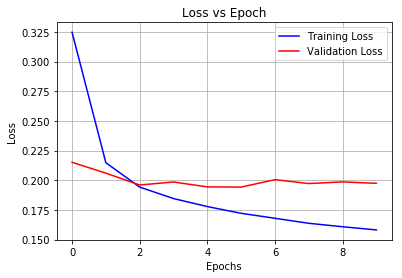

In [0]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

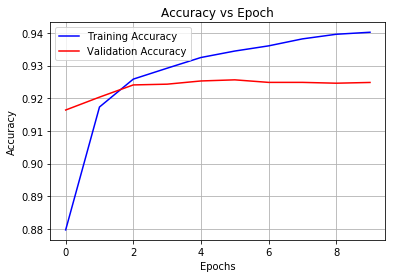

In [0]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [0]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'embedding_2', 'trainable': True, 'batch_input_shape': (None, 100), 'dtype': 'float32', 'input_dim': 72396, 'output_dim': 32, 'embeddings_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'normal', 'seed': None}}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': 100}
{'name': 'dropout_1', 'trainable': True, 'rate': 0.4, 'noise_shape': None, 'seed': None}
{'name': 'lstm_2', 'trainable': True, 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'units': 50, 'activation': 'tanh', 'recurrent_activation': 'hard_sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': 

In [0]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[2].get_weights()[0]
layer3_weights = model.layers[3].get_weights()[0]
layer4_weights = model.layers[5].get_weights()[0]

print(" Embedding Layer Weight Matrix Shape")
print("="*125)
print(layer1_weights.shape)
print(" LSTM 1  Weight Matrix Shape")
print("="*125)
print(layer2_weights.shape)
print(" LSTM 2 Weight Matrix Shape")
print("="*125)
print(layer3_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*125)
print(layer4_weights.shape)

 Embedding Layer Weight Matrix Shape
(72396, 32)
 LSTM 1  Weight Matrix Shape
(32, 200)
 LSTM 2 Weight Matrix Shape
(50, 200)
 Output Layer Weight Matrix Shape
(50, 1)


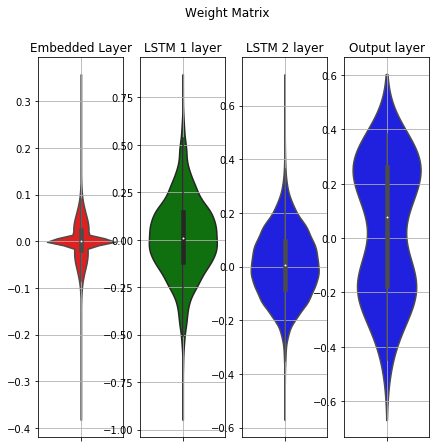

In [0]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(1,figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 4, 1)
plt.title("Embedded Layer")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,4,2)
plt.title("LSTM 1 layer")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,4,3)
plt.title("LSTM 2 layer")
sns.violinplot(y=layer3_weights,color='b')
plt.grid()

plt.subplot(1,4,4)
plt.title("Output layer")
sns.violinplot(y=layer4_weights,color='b')
plt.grid()

#### 4.2.3 Model Evaluation:

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(x_test,y_test,verbose=0)

In [0]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.1919281865505083
 Evaluate Accuracy
0.9259010091310442


#### 4.2.4 Model Observation:

In [18]:
a=PrettyTable()
b=PrettyTable()
b.field_names = ["Optimizer","Dropout rate","Batch Size","Epochs"]
b.add_row(["Adam","0.4",1000,10])
a.field_names = ["LSTM layer","Units","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([2,50,0.1581,0.1973 ,0.1919,0.9402,0.9248,0.9259])
print(b)
print(a)

+-----------+--------------+------------+--------+
| Optimizer | Dropout rate | Batch Size | Epochs |
+-----------+--------------+------------+--------+
|    Adam   |     0.4      |    1000    |   10   |
+-----------+--------------+------------+--------+
+------------+------------+----------+-----------+-----------+---------+----------+
| LSTM layer | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+------------+------------+----------+-----------+-----------+---------+----------+
|     2      |   0.1581   |  0.1973  |   0.1919  |   0.9402  |  0.9248 |  0.9259  |
+------------+------------+----------+-----------+-----------+---------+----------+


### 4.3 Three LSTM layer:

#### 4.3.1 Sequence model:

In [0]:
from keras.layers import Dropout,BatchNormalization
from keras import regularizers

In [0]:
# References
# https://keras.io/layers/embeddings/#embedding
# https://keras.io/layers/recurrent/#lstm
# https://stackoverflow.com/questions/42755820/how-to-use-return-sequences-option-and-timedistributed-layer-in-keras

# vocabulary size = 72395 +1 = 72396 = input_dim

# model creation

model=Sequential()

# embedding layer

model.add(Embedding(input_dim= 72396,output_dim=32,input_length=100,embeddings_initializer="glorot_normal"))

# BN Layer

model.add(BatchNormalization())

# Dropout layer

model.add(Dropout(0.4))

# LSTM layer

model.add(LSTM(50,dropout=0.4,recurrent_dropout=0.4,return_sequences=True,kernel_regularizer=regularizers.l2(0.01)))

# LSTM layer 2

model.add(LSTM(50,dropout=0.4,recurrent_dropout=0.4,return_sequences=True,kernel_regularizer=regularizers.l2(0.01)))

# LSTM layer 3

model.add(LSTM(50,dropout=0.4,recurrent_dropout=0.4,kernel_regularizer=regularizers.l2(0.01)))

# Dropout layer 2

model.add(Dropout(0.4))

# BN Layer 2

model.add(BatchNormalization())

# Dense layer

model.add(Dense(1,activation="sigmoid"))

In [25]:
# Model Summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           2316672   
_________________________________________________________________
batch_normalization_3 (Batch (None, 100, 32)           128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           16600     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
__________

In [0]:
# Model compilation

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

#### 4.3.2 Model Training:

In [27]:
# model training

History=model.fit(x_train,y_train,batch_size=1000,epochs=10,verbose=1,validation_split=0.3)

Instructions for updating:
Use tf.cast instead.
Train on 203935 samples, validate on 87401 samples
Epoch 1/10
203935/203935 [==============================] - 654s 3ms/step - loss: 0.9754 - acc: 0.8262 - val_loss: 0.3066 - val_acc: 0.9101
Epoch 2/10
203935/203935 [==============================] - 647s 3ms/step - loss: 0.2609 - acc: 0.9082 - val_loss: 0.2312 - val_acc: 0.9097
Epoch 3/10
203935/203935 [==============================] - 646s 3ms/step - loss: 0.2222 - acc: 0.9185 - val_loss: 0.2213 - val_acc: 0.9149
Epoch 4/10
203935/203935 [==============================] - 647s 3ms/step - loss: 0.2098 - acc: 0.9229 - val_loss: 0.2235 - val_acc: 0.9145
Epoch 5/10
203935/203935 [==============================] - 646s 3ms/step - loss: 0.2011 - acc: 0.9263 - val_loss: 0.2234 - val_acc: 0.9138
Epoch 6/10
203935/203935 [==============================] - 647s 3ms/step - loss: 0.1954 - acc: 0.9284 - val_loss: 0.2182 - val_acc: 0.9186
Epoch 7/10
203935/203935 [==============================] - 6

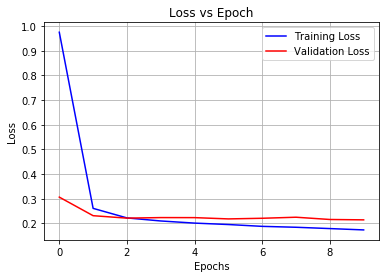

In [28]:
# References
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://keras.io/models/sequential/

# Plotting Loss vs Epoch

plt.close()
plt.plot(History.history['loss'],'b',label="Training Loss")
plt.plot(History.history['val_loss'],'r',label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

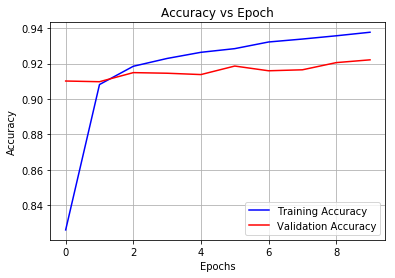

In [29]:
# Plotting Accuracy vs Epoch

plt.close()
plt.plot(History.history['acc'],'b',label="Training Accuracy")
plt.plot(History.history['val_acc'],'r',label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [30]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer


for layer in model.layers:
  print(layer.get_config())

{'name': 'embedding_2', 'trainable': True, 'batch_input_shape': (None, 100), 'dtype': 'float32', 'input_dim': 72396, 'output_dim': 32, 'embeddings_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'normal', 'seed': None}}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': 100}
{'name': 'batch_normalization_3', 'trainable': True, 'axis': -1, 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}
{'name': 'dropout_3', 'trainable': True, 'rate': 0.4, 'noise_shape': None, 'seed': None}
{'name'

In [31]:
# References
# https://stackoverflow.com/questions/43715047/keras-2-x-get-weights-of-layer

layer1_weights = model.layers[0].get_weights()[0]
layer2_weights = model.layers[3].get_weights()[0]
layer3_weights = model.layers[4].get_weights()[0]
layer4_weights = model.layers[5].get_weights()[0]
layer5_weights = model.layers[8].get_weights()[0]


print(" Embedding Layer Weight Matrix Shape")
print("="*125)
print(layer1_weights.shape)
print(" LSTM 1  Weight Matrix Shape")
print("="*125)
print(layer2_weights.shape)
print(" LSTM 2 Weight Matrix Shape")
print("="*125)
print(layer3_weights.shape)
print(" LSTM 3 Weight Matrix Shape")
print("="*125)
print(layer4_weights.shape)
print(" Output Layer Weight Matrix Shape")
print("="*125)
print(layer5_weights.shape)

 Embedding Layer Weight Matrix Shape
(72396, 32)
 LSTM 1  Weight Matrix Shape
(32, 200)
 LSTM 2 Weight Matrix Shape
(50, 200)
 LSTM 3 Weight Matrix Shape
(50, 200)
 Output Layer Weight Matrix Shape
(50, 1)


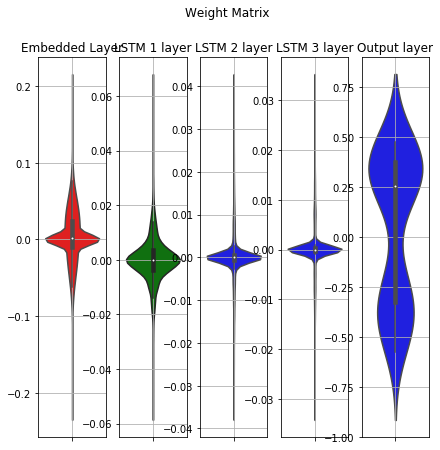

In [32]:
# References 
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

fig = plt.figure(1,figsize=(7,7))
fig.suptitle("Weight Matrix")
plt.subplot(1, 5, 1)
plt.title("Embedded Layer")
sns.violinplot(y=layer1_weights,color='r')
plt.grid()

plt.subplot(1,5,2)
plt.title("LSTM 1 layer")
sns.violinplot(y=layer2_weights,color='g')
plt.grid()

plt.subplot(1,5,3)
plt.title("LSTM 2 layer")
sns.violinplot(y=layer3_weights,color='b')
plt.grid()

plt.subplot(1,5,4)
plt.title("LSTM 3 layer")
sns.violinplot(y=layer4_weights,color='b')
plt.grid()

plt.subplot(1,5,5)
plt.title("Output layer")
sns.violinplot(y=layer5_weights,color='b')
plt.grid()

#### 4.3.3 Model Evaluation:

In [0]:
# Refernces
# https://keras.io/models/model/#evaluate

evaluate_data=model.evaluate(x_test,y_test,verbose=0)

In [34]:
evaluate_loss = evaluate_data[0]
evaluate_acc  = evaluate_data[1]

print(" Evaluate Loss")
print("="*100)
print(evaluate_loss)

print(" Evaluate Accuracy")
print("="*100)
print(evaluate_acc)

 Evaluate Loss
0.21034497041287203
 Evaluate Accuracy
0.9225784307003447


#### 4.3.4 Model Observation:

In [36]:
a=PrettyTable()
b=PrettyTable()
b.field_names = ["Optimizer","Dropout rate","Batch Size","Epochs"]
b.add_row(["Adam","0.4",1000,10])
a.field_names = ["LSTM layer","Units","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([3,50,0.1735,0.2143,0.2103,0.9376,0.9221,0.9225])
print(b)
print(a)

+-----------+--------------+------------+--------+
| Optimizer | Dropout rate | Batch Size | Epochs |
+-----------+--------------+------------+--------+
|    Adam   |     0.4      |    1000    |   10   |
+-----------+--------------+------------+--------+
+------------+-------+------------+----------+-----------+-----------+---------+----------+
| LSTM layer | Units | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+------------+-------+------------+----------+-----------+-----------+---------+----------+
|     3      |   50  |   0.1735   |  0.2143  |   0.2103  |   0.9376  |  0.9221 |  0.9225  |
+------------+-------+------------+----------+-----------+-----------+---------+----------+


### 5. Conclusion:

In [37]:
a=PrettyTable()
b=PrettyTable()
b.field_names = ["LSTM layer","Optimizer","Dropout rate","Batch Size","Epochs","Kernel Regularizer","BN"]
b.add_row([1,"Adam","Nil",1000,10,"Nil","Nil"])
b.add_row([2,"Adam",0.4,1000,10,"Nil","Nil"])
b.add_row([3,"Adam",0.4,1000,10,0.01,"Yes"])
a.field_names = ["LSTM layer","Units","Train loss","Val_loss","Test_loss","Train_acc","Val_acc","Test_acc"]
a.add_row([1,100,0.1074,0.2196 ,0.2180,0.9605,0.9183,0.9180])
a.add_row([2,50,0.1581,0.1973 ,0.1919,0.9402,0.9248,0.9259])
a.add_row([3,50,0.1735,0.2143,0.2103,0.9376,0.9221,0.9225])
print(b)
print("Architecture loss and accuracy comparision")
print("="*100)
print(a)

+------------+-----------+--------------+------------+--------+--------------------+-----+
| LSTM layer | Optimizer | Dropout rate | Batch Size | Epochs | Kernel Regularizer |  BN |
+------------+-----------+--------------+------------+--------+--------------------+-----+
|     1      |    Adam   |     Nil      |    1000    |   10   |        Nil         | Nil |
|     2      |    Adam   |     0.4      |    1000    |   10   |        Nil         | Nil |
|     3      |    Adam   |     0.4      |    1000    |   10   |        0.01        | Yes |
+------------+-----------+--------------+------------+--------+--------------------+-----+
Architecture loss and accuracy comparision
+------------+-------+------------+----------+-----------+-----------+---------+----------+
| LSTM layer | Units | Train loss | Val_loss | Test_loss | Train_acc | Val_acc | Test_acc |
+------------+-------+------------+----------+-----------+-----------+---------+----------+
|     1      |  100  |   0.1074   |  0.2196 

**Data Preparation:**

    After conversion of IMDB dataset format, the pickle files were loaded by using joblib. Then the data was splitted as a train and test data.

**LSTM layers:**

    Using those splitted data's,padding and embedding layer, Different architecture of LSTM(1 layer,2 layer,3 layer) was implemented.

**Loss vs Epoch plot:**

    Loss(Train and Validation) vs Epoch graph has been plotted sucessfully for each of the Architecture.

**Weight Plot:**

    Weight (Weight matrix got After the Optimization) graph has been plotted sucessfully for each of the Architecture.